<img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/>

<h1>Hackwagon Academy - DS101 </h1>

<h1>AirBnB Project</h1>


In [1]:
import csv
 
with open("airbnb_data.csv") as file:
    airbnb_data = []
    for row in csv.DictReader(file):
        airbnb_data.append(dict(row))

print(airbnb_data[0])


{'listing_id': '1133718', 'survey_id': '1280', 'host_id': '6219420', 'room_type': 'Shared room', 'country': '', 'city': 'Singapore', 'borough': '', 'neighborhood': 'MK03', 'reviews': '9', 'overall_satisfaction': '4.5', 'accommodates': '12', 'bedrooms': '1.0', 'bathrooms': '', 'price': '74.0', 'minstay': '', 'last_modified': '2017-05-17 09:10:25.431659', 'latitude': '1.293354', 'longitude': '103.769226', 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}


## Data Cleaning <font color='red'>[5 marks]</font>



In [2]:
for row in airbnb_data:
    row['overall_satisfaction'] = float(row['overall_satisfaction'])
    row['price'] = float(row['price'])
    row['longitude'] = float(row['longitude'])
    row['latitude'] = float(row['latitude'])
    row['reviews'] = float(row['reviews'])





## Exploratory Data Analysis

The data team at AirBnB wishes to find out the answers to a few simple questions on the existing listings in Singapore. Your goal is to manipulate the data you have stored in the list of dictionaries and <b>understand some of the basic statistics of your dataset.</b> The following are some of the common <i>first</i> questions asked.

<h4> Q1. List out each neighborhoods and their number of listings </h4>


In [3]:
results={}
for row in airbnb_data:
    neighid=row['neighborhood']
    if neighid not in results:
        results[neighid]=1
    else:
        results[neighid]+=1

print(results['TS17'])

342


<h4> Q2. List out each neighborhood and their average overall_satisfaction  </h4>



In [4]:
neighborhoodscore={}
neighborhoodcounts={}
results={}
for row in airbnb_data:
    neighid=row['neighborhood']
    overall_satisfaction=row['overall_satisfaction']
    review=row['reviews']
    if review>0:
        if neighid not in neighborhoodscore:
            neighborhoodscore[neighid]=overall_satisfaction
        else:
            neighborhoodscore[neighid]+=overall_satisfaction
        
        if neighid not in neighborhoodcounts:
            neighborhoodcounts[neighid]=1
        else:
            neighborhoodcounts[neighid]+=1
for key,value in neighborhoodscore.items():
    avg=value/neighborhoodcounts[key]
    results[key]=avg

print(results['TS17'])

2.859447004608295


<h4> Q3. List out each neighborhood and their average price </h4>


In [5]:
neighborhoodprice={}
neighborhoodcounts={}
results={}
for row in airbnb_data:
    neighid=row['neighborhood']
    price=row['price']
    
    if neighid not in neighborhoodprice:
        neighborhoodprice[neighid]=price
    else:
        neighborhoodprice[neighid]+=price
        
    if neighid not in neighborhoodcounts:
        neighborhoodcounts[neighid]=1
    else:
        neighborhoodcounts[neighid]+=1
for key,value in neighborhoodprice.items():
    avg=value/neighborhoodcounts[key]
    results[key]=avg

print(results['TS17'])


95.5672514619883


<h4> Q4. Plot a distribution of counts of the overall_satisfaction </h4>


In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Counts')

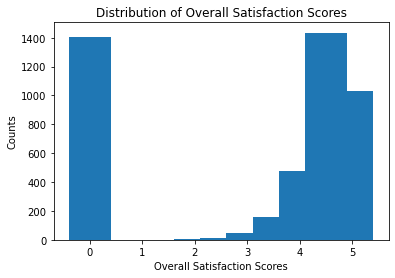

In [7]:
satiscore={}
for row in airbnb_data:

    overall_satisfaction=row['overall_satisfaction']
    review=row['reviews']
    if review>0:
        if overall_satisfaction not in satiscore:
            satiscore[overall_satisfaction]=1
        else:
            satiscore[overall_satisfaction]+=1
        
sat_score=[]  
count_list=[]
for key,value in satiscore.items():
    sat_score.append(key)
    count_list.append(value)

plt.bar(sat_score,count_list)
plt.title("Distribution of Overall Satisfaction Scores")
plt.xlabel('Overall Satisfaction Scores')
plt.ylabel('Counts')

<h4> Q5. Plot a geographical representation of all of the listings in Singapore </h4>


Text(0, 0.5, 'Latitude')

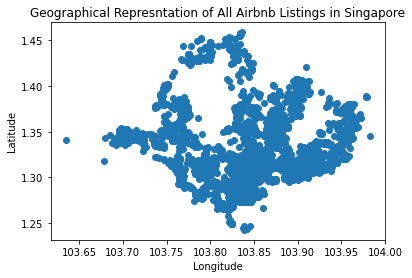

In [8]:
lats=[]
lons=[]

for row in airbnb_data:
    latitude=row['latitude']
    longitude=row['longitude']
    lats.append(latitude) 
    lons.append(longitude)
plt.scatter(lons,lats)
plt.title('Geographical Represntation of All Airbnb Listings in Singapore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

<hr>
</hr>
<h2> AirBnB Visualisation and Price Recommender App</h2>


<b>Scenario:</b>

Based on the earlier EDA, we have seen that it is not modular and does not allow the AirBnB team to look into each neighborhood. Nevertheless, the AirBnB data team have tasked you to build a simple application to improve the earlier EDA while serving its 2 users: Guests and Hosts. 

<b>Your objective:</b> Develop an <b><i>app</i></b> which will serve the 2 main users:
1. Guests
    - Visualisation tool to recommend them the best listings based on price and overall satisfaction score in a neighborhood
2. Hosts
    - Recommend a price to set for their listing in a given neighborhood based on better performing listings

<hr>
</hr>

In [9]:
!pip install mplleaflet

In [10]:
import mplleaflet

<hr></hr>

<h2> Building the App </h2>

To begin building the App, there are 2 things to do:
1. Building the functions
2. Testing the functions 

<b>After we are done building the functions in part 1, we will test them in part 2</b>

In [11]:
def example_function(interesting_data):
    for i in interesting_data:
        print(i)

In [12]:
example_function([1,2,3,4,5])

1
2
3
4
5


### `get_all_latitudes()` - Functions to get all latitudes given a list of listing_ids 



In [13]:
def get_all_latitudes(x,y):
    result=[]
    for row in x:
        for data in y:
            if data in row['listing_id']:
                result.append(row['latitude'])
    return(result)


<b>Tester Cell</b> - To test the above function to see if it's working.

In [14]:
get_all_latitudes(airbnb_data, ['10350448','13507262','13642646'])

[1.305702, 1.296138, 1.304393]

### `get_all_longitudes()` - Functions to get all longitudes given a list of listing_ids 

In [15]:
def get_all_longitudes(x,y):
    result=[]
    for row in x:
        for data in y:
            if data in row['listing_id']:
                result.append(row['longitude'])
    return(result)

  

<b>Tester Cell</b> - To test the above function to see if it's working.


In [16]:
get_all_longitudes(airbnb_data, ['10350448','13507262','13642646'])

[103.79878, 103.767841, 103.784174]

### `listings_recommender()` - Function to recommend all listings based on a given price, satisfaction score and neighborhood 

In [17]:
def listings_recommender(a,b,c,d):
    result=[]
    for row in a:
        listingid=row['listing_id']
        price=row['price']
        overall_satisfaction=row['overall_satisfaction']
        neighborhood_id=row['neighborhood']
        if b>=price: 
            if c<=overall_satisfaction and d==neighborhood_id:
                result.append(listingid)
    return(result)



<b>Tester Cell</b> - To test the above function to see if it's working.

In [18]:
listings_recommender(airbnb_data, 60, 5, 'MK03')

['10350448',
 '13507262',
 '13642646',
 '15099645',
 '6451493',
 '4696031',
 '2898794',
 '13181050',
 '9022211',
 '5200263',
 '6529707',
 '14433262']

### `price_recommender()` - Function to recommend a price in a neighborhood based on average price and overall satisfaction 
For this function, we want to build a <b><i>simple</i></b> price recommendation function that will give a potential host a suggested price.



In [19]:
def price_recommender(a,b):
    result=[]
    for row in a:
        listingid=row['listing_id']
        price=row['price']
        review=row['reviews']
        overall_satisfaction=row['overall_satisfaction']
        neighborhood_id=row['neighborhood']
        if b==neighborhood_id:
            if review>=1:
                if overall_satisfaction>=4:
                    result.append(price)
         
    return(round(sum(result)/len(result), 2))



<b>Tester Cell</b> - To test the above function to see if it's working.


In [20]:
price_recommender(airbnb_data, 'TS17')

66.28

### `visualise_listings()` - Function to geographically visualise a given list of listings 


In [21]:
import mplleaflet
import matplotlib.pyplot as plt


def visualise_listings(a,b):
    get_all_longitudes(a,b)
    get_all_latitudes(a,b)
    
    plt.scatter(get_all_longitudes(a,b),get_all_latitudes(a,b))    
mplleaflet.show()

<b>Tester Cell</b> - To test the above function to see if it's working.



In [22]:
visualise_listings(airbnb_data, ['10350448','13507262','13642646'])
mplleaflet.show()

<h3> User - An Airbnb Host </h3>

Imagine now you're an Airbnb host and you are going to use the app you've developed to ask for a recommended price to list your place. 

<h4> Based on your assigned neighborhood, what is the recommended price for your neighborhood </h4>



In [23]:
neighborhood_to_test = 'TS23'


price_recommender(airbnb_data,neighborhood_to_test)



98.52

<h3> User - An Airbnb Guest </h3>

Imagine now you're an Airbnb guest and you are going to use the app to find a list of listings you want based on your search filter/restrictions.



In [24]:
neighborhood_to_test = 'TS17'
price_to_test = 100
overall_satisfaction_to_test = 4

b=listings_recommender(airbnb_data,price_to_test,overall_satisfaction_to_test,neighborhood_to_test)

import mplleaflet
import matplotlib.pyplot as plt

visualise_listings(airbnb_data,b)
     
mplleaflet.show()